# Geographics data in Raku demo

### ***JavaScript::Google::Charts***

Anton Antonov  
[RakuForPrediction at WordPress](https://rakuforprediction.wordpress.com)   
[RakuForPrediction-book at GitHub](https://github.com/antononcube/RakuForPrediction-book)   
June 2024  

In [1]:
#%html
    use Data::Geographics;
    use JavaScript::Google::Charts;
    js-google-charts('GeoChart',
        country-data.map({ Country => $_.value<Name>, Population => $_.value<Population>})».Hash,
        width => 1400,
        height => 400,
        backgroundColor => '1f1F1F',
        datalessRegionColor => 'Gray',
        format => 'html'
        )

<!--Load the AJAX API-->
 
 
 

 
 <!--Div that will hold the pie chart-->

-----

## Introduction

This notebook showcase the data and functionalities of Raku packages for:

- Geographic data and named entity recognition
- Geometric computations
- Data wrangling and summarization
- Visualization

Since the exposition is in a chat-enabled notebook (***chatbook***) the exposition showcases data presentation and formatting.

This notebook can be alternatively seen as showcasing Raku for Geo-data exploratory analysis. (Similar to [AA1, AAv1].)

### D3.js vs Google Charts

The first version of this notebook was made with ["JavaScript::D3"](https://raku.land/zef:antononcube/JavaScript::D3), [AAp9]. 
After multiple "small difficulties" to get good Geo-plots, I decided to implement 
["JavaScript::Google::Charts"](https://raku.land/zef:antononcube/JavaScript::Google::Charts), [AAp10],
which does provides Geo-charts (with extensive documentation.)

**Remark:** This notebook uses ["JavaScript::Google::Charts"](https://raku.land/zef:antononcube/JavaScript::Google::Charts), [AAp10].

Further comparison points:

- ["JavaScript::D3"](https://raku.land/zef:antononcube/JavaScript::D3) is for making plots and charts using intuitive interface. 
    - Suitable for a "simple Raku developer".
    - Complicated and exotic plots can be programmed.
        - Using both Raku and JavaScript.

- ["JavaScript::Google::Charts"](https://raku.land/zef:antononcube/JavaScript::Google::Charts) is for making plots and charts by adapting to Google Charts (GS), 
    - Following GC's workflow design.
    - GC's extensive documentation is immediately available.
        - And it is applicable for making GC Raku specs.
    - Since it is a mature product, GC specs are well known or understood by LLMs.
    - GC has chart-to-image creation and downloading "out of the box."

------

## Setup

Here are loaded the packages used in the rest of notebook:

In [2]:
use Data::Reshapers;
use Data::Summarizers;
use Data::TypeSystem;
use Data::Translators;
use Data::Geographics;
use Math::Fitting;
use Math::Nearest;
use Hash::Merge;

use DSL::Entity::Geographics;
use DSL::English::DataQueryWorkflows;

use JavaScript::Google::Charts;
use WWW::MermaidInk;

Here we prepare the notebook to visualize with JavaScript:

In [3]:
#% javascript
google.charts.load('current', {'packages':['corechart']});
google.charts.load('current', {'packages':['gauge']});
google.charts.load('current', {'packages':['wordtree']});
google.charts.load('current', {'packages':['geochart']});
google.charts.load('current', {'packages':['table']});
google.charts.load('current', {'packages':['line']});
google.charts.setOnLoadCallback(function() {
    console.log('Google Charts library loaded');
});



Here we set a collection of visualization variables:

In [4]:
my $format = 'html';
my $titleTextStyle = { color => 'Ivory' };
my $backgroundColor = '#1F1F1F';
my $legendTextStyle = { color => 'Silver' };
my $legend = { position => "none", textStyle => {fontSize => 14, color => 'Silver'} };

my $hAxis = { title => 'x', titleTextStyle => { color => 'Silver' }, textStyle => { color => 'Gray'}, logScale => False, format => 'scientific'};
my $vAxis = { title => 'y', titleTextStyle => { color => 'Silver' }, textStyle => { color => 'Gray'}, logScale => False, format => 'scientific'};

my $annotations = {textStyle => {color => 'Silver', fontSize => 10}};
my $chartArea = {left => 50, right => 50, top => 50, bottom => 50, width => '90%', height => '90%'};

my $background = '1F1F1F';
my $mmd-theme = q:to/END/;
%%{
  init: {
    'theme': 'forest',
    'themeVariables': {
      'lineColor': 'Ivory'
    }
  }
}%%
END

%%{
  init: {
    'theme': 'forest',
    'themeVariables': {
      'lineColor': 'Ivory'
    }
  }
}%%


Verification (using just JavaScript, without going to HTML):

In [5]:
#% js
js-google-charts('LineChart', 10.rand xx 40, :$backgroundColor, :$legendTextStyle, :$hAxis, :$vAxis, :$chartArea, :$legend)

Using HTML format:

In [6]:
#% html
js-google-charts('LineChart', 10.rand xx 40, :$backgroundColor, :$legendTextStyle, :$hAxis, :$vAxis, :$chartArea, :$legend, format => 'html', div-id => 'test')

<!--Load the AJAX API-->
 
 
 

 
 <!--Div that will hold the pie chart-->

------

## Google Charts code assitant

In [54]:
#% chat gc prompt, model=gpt-4o, max-tokens=4096
You are Code Writer and as the coder that you are, you provide clear and concise code only, without explanation nor conversation. 
Your job is to output code with no accompanying text.
Do not explain any code unless asked. Do not provide summaries unless asked.
You are the best Google Charts programmer in the world but do not converse.
You know the Google Charts documentation better than anyone but do not converse.
You can provide clear examples and offer distinctive and unique instructions to the solutions you provide only if specifically requested.
Only code in Google Charts unless told otherwise.
Unless they ask, you will only give code.
When asked about options give only options code not complete HTML code.
Unless they say differently give your options answers as Raku code.

Chat object created with ID : gc.

In [55]:
#% chat gc
With what options to specify the background of the inactive countries with no data in the Geo chart?

```raku
{
  backgroundColor: '#F0F0F0',
  datalessRegionColor: '#E0E0E0'
}
```

In [56]:
#% chat gc > html
Give the HTML code for a chart that shows Cuba and the Caribbean islands. 
Color each country in the green-orange scale; use the div 'cuba'.
Use dark mode background color; paint the other countries with slate gray.

```html
<!DOCTYPE html>
 
 
 
 
 
 
 
 
 
```

-------

## Country data

Here is a list of the countries the package "Data::Geographics" has data for:

In [10]:
#% html
country-data().keys.sort ==> to-html(:multicolumn, columns => 3)

Botswana,Hungary,Serbia
Brazil,Iran,Slovakia
Bulgaria,Iraq,SouthAfrica
Canada,Japan,SouthKorea
China,Mexico,Spain
CzechRepublic,NorthKorea,Sweden
Denmark,Poland,Turkey
Finland,Romania,Ukraine
France,Russia,UnitedStates
Germany,SaudiArabia,(Any)


In [11]:
#% html
country-data.head.value.keys.sort.List
==> to-html(:multicolumn, columns => 5, align => 'left')

AMRadioStations,ElderlyPopulation,GiniIndex,MaleAdultPopulation,OilProduction,WaterArea
AdultPopulation,ElectricalGridFrequency,GovernmentConsumption,MaleChildPopulation,OilReserves,WaterwayLength
AgriculturalProducts,ElectricalGridPlugs,GovernmentDebt,MaleElderlyPopulation,PavedAirportLengths,(Any)
AgriculturalValueAdded,ElectricalGridSockets,GovernmentExpenditures,MaleInfantMortalityFraction,PavedAirports,(Any)
Airports,ElectricalGridVoltages,GovernmentReceipts,MaleLifeExpectancy,PavedRoadLength,(Any)
AlternateNames,ElectricityConsumption,GovernmentSurplus,MaleLiteracyFraction,PhoneLines,(Any)
AlternateStandardNames,ElectricityExports,GrossInvestment,MaleMedianAge,Pipelines,(Any)
AnnualBirths,ElectricityImports,HIVAIDSDeathRateFraction,MalePopulation,Population,(Any)
AnnualDeaths,ElectricityProduction,HIVAIDSFraction,ManufacturingValueAdded,PopulationGrowth,(Any)
AnnualHIVAIDSDeaths,EnvironmentalAgreements,HIVAIDSPopulation,MaritimeClaims,PovertyFraction,(Any)
ArableLandArea,EnvironmentalIssues,HighestElevation,MedianAge,PriceIndex,(Any)


In [12]:
#% html
my @field-names = <Name FullNativeName ISOName Area Population GDP ElectricityProduction>;
my @dsCountries = country-data().map({ @field-names Z=> $_.value{|@field-names} })>>.Hash;
@dsCountries = @dsCountries.map({ $_.deepmap({ $_ ~~ Numeric:D ?? $_.round !! $_ }) });
@dsCountries.sort(*<Name>) ==> to-html(:@field-names, align => Whatever)

Name,FullNativeName,ISOName,Area,Population,GDP,ElectricityProduction
Botswana,Republic of Botswana,BOTSWANA,581730,2700000,15781732826,2143597000
Brazil,República Federativa do Brasil,BRAZIL,8514877,216400000,1444733258972,614724000000
Bulgaria,Republika Bŭlgariya,BULGARIA,110879,6700000,69105101090,47550809000
Canada,Canada,CANADA,9984670,38800000,1644037286481,643035676000
China,Zhonghua Renmin Gongheguo,CHINA,9596960,1425700000,14722730697890,7190458000000
Czech Republic,Česká republika,CZECH REPUBLIC,78867,10500000,245349489988,84907272000
Denmark,Kongeriget Danmark,DENMARK,43094,5900000,356084867686,33042851000
Finland,Suomen Tasavalta,FINLAND,338145,5500000,269751312854,71711000000
France,République française,FRANCE,551500,64800000,2630317731455,529100000000
Germany,Bundesrepublik Deutschland,GERMANY,357022,83300000,3846413928654,596195000000


### Correlation (scatter) plot 

In [13]:
my @dsCountries2 = 
|select-columns(@dsCountries, (<Name GDP ElectricityProduction> Z=> <role:annotation GDP ElectricityProduction>).Hash);


[{ElectricityProduction => 614724000000, GDP => 1444733258972, role:annotation => Brazil} {ElectricityProduction => 35273872000, GDP => 52960134079, role:annotation => Serbia} {ElectricityProduction => 71711000000, GDP => 269751312854, role:annotation => Finland} {ElectricityProduction => 643035676000, GDP => 1644037286481, role:annotation => Canada} {ElectricityProduction => 315706546000, GDP => 191718271484, role:annotation => Iran} {ElectricityProduction => 2143597000, GDP => 15781732826, role:annotation => Botswana} {ElectricityProduction => 29709000000, GDP => 104574146248, role:annotation => Slovakia} {ElectricityProduction => 529100000000, GDP => 2630317731455, role:annotation => France} {ElectricityProduction => 7190458000000, GDP => 14722730697890, role:annotation => China} {ElectricityProduction => 274134000000, GDP => 1281484640044, role:annotation => Spain} {ElectricityProduction => 36130000000, GDP => 155012927629, role:annotation => Hungary} {ElectricityProduction => 5926

In [63]:
#% html
js-google-charts('Scatter',
    @dsCountries2,
    column-names => <GDP ElectricityProduction role:annotation>,
    width => 500,
    height => 500,
    title => "GDP vs Electricity production", 
    colors => ['Orange', 'Red'],
    :$annotations,
    :$titleTextStyle,
    hAxis => merge-hash($hAxis, {title => 'GDP', :logScale, format => 'short'}), 
    vAxis => merge-hash($vAxis, {title => 'Electricity production', :logScale,}),
    # trendlines => {
    #     0 => {
    #     type => 'linear',
    #     :visibleInLegend
    #     }
    # },
    :$backgroundColor,
    :$legend,
    :$chartArea,
    :$format,
    div-id => 'GDPvsElectricity',
    :!png-button
)

<!--Load the AJAX API-->
 
 
 

 
 <!--Div that will hold the pie chart-->

#### Fitting

In [15]:
my @data = @dsCountries2.map(*<GDP ElectricityProduction>).deepmap(*.log10);
my &lm = linear-model-fit(@data);
my ($intercept, $slope) = &lm('BestFitParameters');
say (:$intercept, :$slope);

(intercept => 0.6719587872753299 slope => 0.9049080671821587)


Summary of the residuals verification:

In [16]:
sink records-summary( &lm('Residuals') )

+---------------------------------+
| numerical                       |
+---------------------------------+
| Max    => 0.6059752422970703    |
| Mean   => 3.001430521745251e-15 |
| Min    => -0.6175515747931453   |
| 1st-Qu => -0.18387264979566353  |
| 3rd-Qu => 0.17901168755961727   |
| Median => 0.043132673325713355  |
+---------------------------------+


In [17]:
#%html
js-google-charts('Scatter', &lm('Residuals'), 
    width => 700,
    :$backgroundColor,
    :$legend,
    :$format,
    div-id => 'FitResiduals'
)

<!--Load the AJAX API-->
 
 
 

 
 <!--Div that will hold the pie chart-->

Add the fit points to the original data:

In [64]:
my @dsCountries3 = @dsCountries2.map({ my %h = $_.clone; %h.push(Pair.new('Fit', 10 ** &lm($_<GDP>.log10))); %h });

deduce-type(@dsCountries3)

Vector(Struct([ElectricityProduction, Fit, GDP, role:annotation], [Int, Num, Int, Str]), 29)

Plot the data and the fit:

In [19]:
#% html
    js-google-charts('ComboChart',
        @dsCountries3,
        column-names => <GDP ElectricityProduction Fit>,
        width => 500,
        height => 500,
        title => "GDP vs Electricity production", 
        colors => ['Orange', 'Red'],
        :$annotations,
        :$titleTextStyle,
        hAxis => merge-hash($hAxis, {title => 'GDP', :logScale, format => 'short'}), 
        vAxis => merge-hash($vAxis, {title => 'Electricity production', :logScale,}),
        seriesType => 'scatter',
        series => {1 => {type => 'line'}},
        :$backgroundColor,
        :$legend,
        :$chartArea,
        :$format,
        div-id => 'GDPvsElectricityvsFit',
        :!png-button
    )

<!--Load the AJAX API-->
 
 
 

 
 <!--Div that will hold the pie chart-->

### Contour plot 

"Data::Geographics" knows country contours:

In [20]:
#% html
my @coords = |country-data(){'UnitedStates'}<Coordinates>.head.map({ <x y> Z=> $_.reverse.Array })».Hash;
js-google-charts('LineChart',
    @coords,
    title => 'USA countour',
    column-names => <x y>,
    :$titleTextStyle,
    width => 1000, 
    height => 500,
    :$backgroundColor, 
    :$legend,
    :$chartArea,
    :$format,
    div-id => 'USACountour'
)

<!--Load the AJAX API-->
 
 
 

 
 <!--Div that will hold the pie chart-->

----- 

## City data

In [21]:
my @field-names = <ID Country State City Population Latitude Longitude Elevation LocationLink>;
my @dsCityData = |city-data().grep({ $_<Country> eq 'United States' });

@dsCityData.&dimensions

(32796 9)

Here is an HTML table of a sample of cities with "clickable" location links:

In [69]:
#% html
@dsCityData.pick(12) 
==> to-html(:@field-names) 
==> { $_.subst(:g, / <?after '<td>'> ('http' .*?) <before '</td>'> /, { "<a href=\"$0\">link</a>" }) }()

ID,Country,State,City,Population,Latitude,Longitude,Elevation,LocationLink
United_States.Kansas.Mc_Farland,United States,Kansas,Mc Farland,272,39.0546911,-96.237983,310,link
United_States.North_Dakota.Sherwood,United States,North Dakota,Sherwood,194,48.9618568,-101.6328848,501,link
United_States.Wisconsin.Cashton,United States,Wisconsin,Cashton,1158,43.7404822,-90.78871,415,link
United_States.Michigan.Holt,United States,Michigan,Holt,25625,42.6420611,-84.5307676,269,link
United_States.Wisconsin.Norway,United States,Wisconsin,Norway,7916,42.7968314,-88.1227542,235,link
United_States.Missouri.La_Monte,United States,Missouri,La Monte,1014,38.7716824,-93.4239073,262,link
United_States.Nebraska.Brock,United States,Nebraska,Brock,123,40.4804749,-95.9600529,294,link
United_States.Arizona.Oro_Valley,United States,Arizona,Oro Valley,47070,32.4220943,-110.9762349,775,link
United_States.California.Gazelle,United States,California,Gazelle,95,41.521538,-122.520718,844,link
United_States.South_Dakota.Castlewood,United States,South Dakota,Castlewood,698,44.7241577,-97.0309205,514,link


-----

## State distributions for USA

In [70]:
'use @dsCityData; 
 group by "State"; 
 summarize "Population"'
==> ToDataQueryWorkflowCode(target => 'Raku::Reshapers', format => 'code')
==> cbcopy

$obj = @dsCityData ;
$obj = group-by($obj, "State") ;
$obj = $obj.map({ $_.key => summarize-at($_.value, ("Population"), (&elems, &min, &max)) })

In [24]:
my $obj = @dsCityData ;
$obj = group-by($obj, "State") ;
$obj = $obj.map({ $_.key => summarize-at($_.value, ("Population"), (&elems, &sum)) }).Array;

.say for $obj.head(3)

Nevada => {Population.elems => 124, Population.sum => 2968591}
Colorado => {Population.elems => 464, Population.sum => 5037531}
Washington => {Population.elems => 657, Population.sum => 6668664}


In [71]:
my @dsStateData = $obj.map({ <State NumberOfCities Population> Z=> [$_.key, |$_.value<Population.elems Population.sum>] })>>.Hash;

@dsStateData = @dsStateData.map({ $_<role:tooltip> = "<div style=\"background-color:#3F3F3F\"><b>{$_<State>}</b><br/>NumberOfCities: {$_<NumberOfCities>}<br/>Population: {$_<Population>}</div>"; $_});

deduce-type(@dsStateData)

Vector(Struct([NumberOfCities, Population, State, role:tooltip], [Int, Int, Str, Str]), 51)

In [72]:
#% html
@dsStateData = @dsStateData.sort({ - $_<Population> });

@dsStateData.head(2) ==> to-html()

State,Population,NumberOfCities,role:tooltip
California,37701022,1539,"<div style=""background-color:#3F3F3F""><b>California</b><br/>NumberOfCities: 1539<br/>Population: 37701022</div>"
Texas,22456375,1756,"<div style=""background-color:#3F3F3F""><b>Texas</b><br/>NumberOfCities: 1756<br/>Population: 22456375</div>"


In [77]:
#%html
# Both tooltip => {:isHtml} and 'p': {'html': true} specs have to be placed
# in order to have HTML formatted tooltips.
js-google-charts('Scatter',
    @dsStateData,
    column-names => <NumberOfCities Population role:tooltip>,
    width => 500,
    height => 500,
    title => 'USA state cities and populations',
    colors => ['Orange', 'Red'],
    :$annotations,
    :$titleTextStyle,
    hAxis => merge-hash($hAxis, {title => 'Number of cities', :!logScale, format => 'short'}), 
    vAxis => merge-hash($vAxis, {title => 'Population', :logScale,}),
    :$backgroundColor,
    :$legend,
    :$chartArea,
    tooltip => {:isHtml},
    :$format,
    div-id => 'CitiesVsPops',
    :!png-button
).subst("data.addColumn(\{type:'string', role:'tooltip'\})", "data.addColumn(\{type:'string', role:'tooltip', 'p': \{'html': true\}\})")

<!--Load the AJAX API-->
 
 
 

 
 <!--Div that will hold the pie chart-->

In [28]:
#% html
my @data = @dsStateData.clone.sort(*<NumberOfCities>).reverse.map({ 
    $_<variable> = $_<State>; 
    $_<value> = $_<NumberOfCities>; 
    $_<role:annotation> = $_<NumberOfCities>.Str; 
    $_ 
});

@data = select-columns(@data, <value variable role:annotation>);
js-google-charts('Bar',
    @data, 
    width => 700,
    height => 700,
    title => 'USA state cities and populations',
    colors => ['DarkSlateGray',],
    :$annotations,
    :$titleTextStyle,
    hAxis => merge-hash($hAxis, {title => 'Number of cities', format => 'short'}), 
    :$backgroundColor,
    :$legend,
    :$chartArea,
    :$format,
     div-id => 'NumberOfCities',
    :!png-button
)

<!--Load the AJAX API-->
 
 
 

 
 <!--Div that will hold the pie chart-->

### Pareto principle adherence

In [29]:
@dsStateData = @dsStateData.sort(*<NumberOfCities>).reverse;
my @paretoCities = @dsStateData.map({ "{$_<State>} : {$_<NumberOfCities>}" }) Z=> pareto-principle-statistic(@dsStateData.map(*<NumberOfCities>));
my $k = 0;
@paretoCities = @paretoCities.map({ %( tooltip => $_.key, x => $k++, y => $_.value, group => 'Cities') });

@dsStateData = @dsStateData.sort(*<Population>).reverse;
my @paretoPopulations = @dsStateData.map({ "{$_<State>} : {$_<Population>}" }) Z=> pareto-principle-statistic(@dsStateData.map(*<Population>));
my $k = 0;
@paretoPopulations = @paretoPopulations.map({ %( tooltip => $_.key, x => $k++, y => $_.value, group => 'Populations') });

say deduce-type(@paretoCities);
say deduce-type(@paretoPopulations);

Vector(Struct([group, tooltip, x, y], [Str, Str, Int, Rat]), 51)
Vector(Struct([group, tooltip, x, y], [Str, Str, Int, Rat]), 51)


In [30]:
select-columns(@paretoPopulations, <x group y>).head(5).raku;

(${:group("Populations"), :x(0), :y(<18850511/132248859>)}, ${:group("Populations"), :x(1), :y(<60157397/264497718>)}, ${:group("Populations"), :x(2), :y(<13496497/44082953>)}, ${:group("Populations"), :x(3), :y(<48896489/132248859>)}, ${:group("Populations"), :x(4), :y(<36373957/88165906>)}).Seq

In [31]:
my @paretoWide = to-wide-format([|@paretoCities, |@paretoPopulations], <x>, <group>, <y>);
sink records-summary(@paretoWide)

+--------------------+--------------+--------------------------------+-------------------------+
| Cities             | x            | tooltip                        | Populations             |
+--------------------+--------------+--------------------------------+-------------------------+
| Min    => 0.056531 | Min    => 0  | Arizona : 6668804        => 1  | Min    => 0.1425381749  |
| 1st-Qu => 0.51366  | 1st-Qu => 12 | Arizona : 458            => 1  | 1st-Qu => 0.630275585   |
| Mean   => 0.694749 | Mean   => 25 | District of Columbia : 1 => 1  | Mean   => 0.77524964877 |
| Median => 0.755976 | Median => 25 | Utah : 336               => 1  | Median => 0.8538327578  |
| 3rd-Qu => 0.925235 | 3rd-Qu => 38 | New Mexico : 446         => 1  | 3rd-Qu => 0.9639472277  |
| Max    => 1        | Max    => 50 | Wisconsin : 1785         => 1  | Max    => 1             |
|                    |              | North Dakota : 656757    => 1  |                         |
|                    |        

In [32]:
#% html
js-google-charts('Scatter',
    @paretoWide,
    column-names => <x Cities Populations>,
    width => 700,
    height => 400,
    title => 'Pareto principle', 
    :$annotations,
    :$titleTextStyle,
    hAxis => merge-hash($hAxis, {title => 'Index'}),
    colors => ['Orange', 'SlateBlue'],
    :$backgroundColor,
    :$chartArea,
    :$format,
    legend => { position => 'bottom', textStyle => {fontSize => 14, color => 'Silver'} },
    div-id => 'ParetoPlotLine',
    :!png-button
)

<!--Load the AJAX API-->
 
 
 

 
 <!--Div that will hold the pie chart-->

#### Different separation

In [33]:
my @combinedTable = [
    |@paretoCities.map({ 
        my %h = $_.clone; 
        %h<role:tooltip> = %h<tooltip>; 
        %h<role:style> = 'point { size: 3; shape-type: circle; fill-color: Orange; }'; 
        %h }),
    |@paretoPopulations.map({ 
        my %h = $_.clone; 
        %h<role:tooltip> = %h<tooltip>;
        %h<role:style> = 'point { size: 3; shape-type: circle; fill-color: SlateGray; }'; 
        %h })
];

deduce-type(@combinedTable)

Vector(Struct([group, role:style, role:tooltip, tooltip, x, y], [Str, Str, Str, Str, Int, Rat]), 102)

In [34]:
#% html
js-google-charts('Scatter',
    @combinedTable,
    column-names => <x y role:style role:tooltip>,
    width => 700,
    height => 400,
    title => 'Pareto principle', 
    :$annotations,
    :$titleTextStyle,
    hAxis => merge-hash($hAxis, {title => 'Index'}), 
    :$backgroundColor,
    :$chartArea,
    legend => 'none',
    :$format,
    div-id => 'ParetoPlotStyled',
    :!png-button
)

<!--Load the AJAX API-->
 
 
 

 
 <!--Div that will hold the pie chart-->

-----

## Cities Geo-locations

In [78]:
my @data = city-data().grep({ $_<Country> eq 'United States'});
@data = @data.grep({ -130 ≤ $_<Longitude> ≤ -60});
@data.&dimensions

(32282 9)

In [79]:
my @plot-data = 
    @data.map({ 
        my %h = $_.clone; 
        %h<Group> = 'data';
        %h<Value> = %(v => 1, f => "{%h<City>} : {%h<Population>}"); 
        %h 
    });

@plot-data = select-columns(@plot-data, <ID Latitude Longitude Population Group Value>);
@plot-data.&dimensions

(32282 6)

Here we prepare data for finding nearest cities for given Geo-location -- we make a mapping from identifiers to latitude-longitude pairs:

In [80]:
my %locations = @data.map({ $_<ID> => $_<Latitude Longitude>});
say deduce-type(%locations);
%locations.pick(3)

Assoc(Vector(Atom((Str)), 31599), Tuple([Tuple([Atom((Int)), Atom((Rat))]) => 1, Vector(Atom((Rat)), 2) => 31598], 31599), 31599)


(United_States.New_Jersey.Roosevelt => (40.2207424 -74.4701547) United_States.Minnesota.Sherburn => (43.6548066 -94.7272731) United_States.California.West_Sacramento => (38.5545086 -121.5488076))

Here we make _nearest_ function for the labeled Geo-locations:

In [38]:
my &nf = nearest(%locations.pairs, distance-function => &geo-distance)

Math::Nearest::Finder(Algorithm::KDimensionalTree(points => 31599, distance-function => &geo-distance, labels => 31599))

Find the identifier for Las Vegas, Nevada:

In [39]:
my $id = @data.grep({ $_<ID> ~~ /Nevada .* Las .* Vegas/}).head<ID>;

United_States.Nevada.Las_Vegas

Alternatively, we can do Named Entity Recognition (NER) lookup using a function of the package "DSL::Entity::Geographics":

In [85]:
entity-city-and-state-name('Las Vegas, Nevada', 'Raku::System')

United_States.Nevada.Las_Vegas

In [89]:
.say for entity-city-and-state-name('Atlanta United States', 'Raku::System'):ex

United_States.Michigan.Atlanta
United_States.Wisconsin.Atlanta
United_States.Kansas.Atlanta
United_States.Nebraska.Atlanta
United_States.Georgia.Atlanta
United_States.Indiana.Atlanta
United_States.Missouri.Atlanta
United_States.Illinois.Atlanta
United_States.Texas.Atlanta
United_States.Louisiana.Atlanta


Here we find cities nearest to Las Vegas, Nevada:

In [82]:
my @nns-labels = &nf(%locations{$id}, (Whatever, 100_000), prop => <label>).flat;
my @plot-nns-data = @plot-data.grep({ $_<ID> ∈ @nns-labels }).map({ my %h = $_.clone; %h<Value><v> = 2; %h });
@plot-nns-data.&dimensions

(24 6)

Here we plot USA cities (towns, villages) with populations larger than 1,000 and the Las Vegas' neighbors found above:

In [83]:
my %search-point = @plot-nns-data.head;
%search-point<Value><v> = 3;

my @plot-data2 = [|@plot-data.grep({ $_<Population> ≥ 1_000}), |@plot-nns-data, %search-point];

deduce-type(@plot-data2):tally;

Vector(Struct([Group, ID, Latitude, Longitude, Population, Value], [Str, Str, Rat, Rat, Int, Hash]), 16896)

In [84]:
#%html
my @column-names = <Latitude Longitude Value>;

js-google-charts('GeoChart', 
    @plot-data2,
    :@column-names,
    width => 1400,
    height => 800,
    title => 'Populations',
    region => 'US',
    displayMode => 'Markers',
    datalessRegionColor => 'DimGray',
    :enableRegionInteractivity,
    resolution => 'provinces',
    colors => ['blue', 'orange', 'red'],
    #colorAxis =>  {minValue => 0, maxValue => 0, colors => ["#6699CC",]},
    :$titleTextStyle,
    backgroundColor => {fill => 'transparent', stroke => '#FFF', strokeWidth => 1}, 
    :$legendTextStyle,
    sizeAxis => {minValue => 1, maxValue => 3, minSize => 3,  maxSize => 3},
    :$chartArea,
    legend => 'none',
    format => 'html',
    div-id => 'geoUSA'
)

<!--Load the AJAX API-->

------

## Nearest neighbor graphs

In this section we demonstrate the making of nearest neighbor graphs for Geo-locations.

In [44]:
my %locations-ne = @data.grep({ $_<State> eq 'Nevada' && $_<Population> ≥ 30_000 }).map({ $_<ID> => $_<Latitude Longitude>});
%locations-ne .= map({ $_.key.subst('United_States.Nevada.', '', :g) => $_.value });
say deduce-type(%locations-ne);
%locations-ne.pick(3)

Assoc(Atom((Str)), Vector(Atom((Rat)), 2), 14)


(Las_Vegas => (36.2277116 -115.2640448) Sparks => (39.5693715 -119.7069264) Winchester => (36.1366697 -115.1300461))

### Nearest neighbor graph

Here derive the nearest neighbor graph and plot it via [mermaid-ink](https://mermaid.ink):

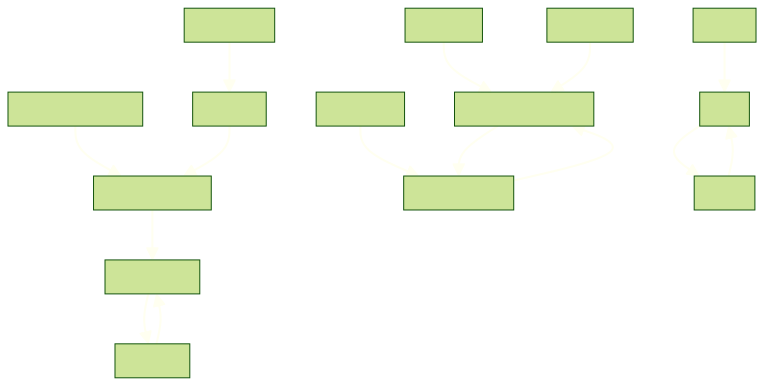

In [45]:
nearest-neighbor-graph(%locations-ne.pairs, distance-function => &geo-distance, format => 'mermaid')
==> { $_ ~ "\n" ~ $mmd-theme }()                # add styling
==> mermaid-ink(format => 'svg', :$background)  # get the Mermaid-JS plot as SVG
==> { .subst('United_States.', '', :g)}()       # shorten the node names

The graph above was derived by using only one neighbor for each city -- its closest neighbor:

### Nearest neighbors via proximity disk

Alternatively, we can be make a graph based on the neighbors with a certain radius. 
Here we specify the making of such graph with all neighbors for each city that within 8 miles radius.
Note that we had to define the variant of `&geo-distance` in order to use mile-units:

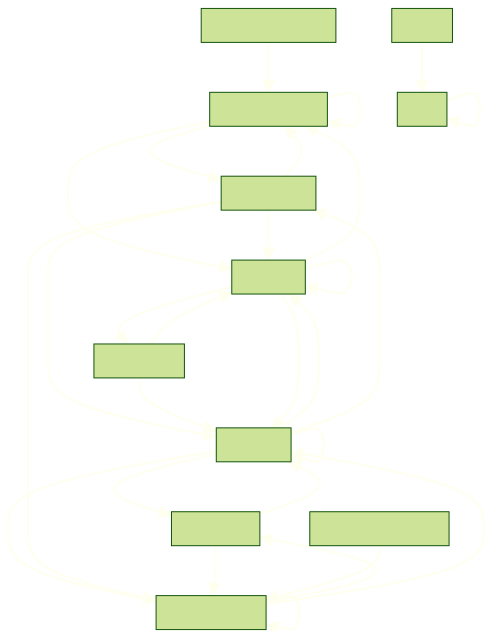

In [46]:
nearest-neighbor-graph(%locations-ne.pairs, (Whatever, 8), distance-function => { &geo-distance($^a, $^b, units => 'miles') }, format => 'mermaid')
==> { $_ ~ "\n" ~ $mmd-theme }()                # add styling
==> mermaid-ink(format => 'svg', :$background)  # get the Mermaid-JS plot as SVG
==> { .subst('United_States.', '', :g)}()       # shorten the node names

Let us "verify" the graph by making the contingency table of distances. Here we compute the long form of the distances dataset, and then we cross-tabulate that dataset:

In [47]:
my @tbl = (%locations-ne X %locations-ne).map({ %( from => $_.head.key, to => $_.tail.key, distance => &geo-distance($_.head.value, $_.tail.value, units => 'miles').round(0.1) ) });
my @ct = cross-tabulate(@tbl, 'from', 'to', 'distance').sort(*.key);

deduce-type(@ct)

Vector(Pair(Atom((Str)), Assoc(Atom((Str)), Atom((Rat)), 14)), 14)

Here is contingency table in HTML:

In [48]:
#% html
@ct.map({ ['from' => $_.key , |$_.value].Hash }) ==> to-html(field-names => ['from', |@ct>>.key])


from,Carson,Enterprise,Henderson,Las_Vegas,North_Las_Vegas,Pahrump,Paradise,Reno,Sparks,Spring_Valley,Summerlin_South,Sunrise_Manor,Whitney,Winchester
Carson,0,329.5,337.2,317.8,322.8,286.5,329.9,22.3,28.8,323.8,319.7,329.2,333.2,327.6
Enterprise,329.5,0,10,14.7,19.6,47.5,6.2,345.4,347.2,6.1,9.8,14.5,11.4,9.5
Henderson,337.2,10,0,19.6,18.9,57.1,7.3,352.8,354.4,13.9,18.2,11.5,6.1,10
Las_Vegas,317.8,14.7,19.6,0,10.5,42.1,12.4,333.4,334.9,8.9,8.1,12.5,15.4,9.8
North_Las_Vegas,322.8,19.6,18.9,10.5,0,51.9,14.2,337.9,339.3,16,17.5,7.6,12.9,10.4
Pahrump,286.5,47.5,57.1,42.1,51.9,0,50.5,303.5,305.7,43.4,39.2,54.3,55.6,50.2
Paradise,329.9,6.2,7.3,12.4,14.2,50.5,0,345.5,347.2,7.1,11.3,8.4,5.7,3.9
Reno,22.3,345.4,352.8,333.4,337.9,303.5,345.5,0,7.5,339.7,335.6,344.4,348.6,343.1
Sparks,28.8,347.2,354.4,334.9,339.3,305.7,347.2,7.5,0,341.4,337.4,345.9,350.1,344.7
Spring_Valley,323.8,6.1,13.9,8.9,16,43.4,7.1,339.7,341.4,0,4.3,13.1,12.5,7.8


-------

## Future plans

A variety of improvements can be done in the presented packages. Some features need fundamental revisiting of the package implementations. The sub-sections below correspond to each package considered. The features listed closer to the tope are of higher priority.

### Data::Geographics

- Figure out how to archive the data
   - One of the reasons currently to have a small set of countries is the data files are ≈ 30 MB.
- More countries
   - Both country data and city data
- Administrative divisions data

### DSL::Entity::Geographics

- Multi-language recognition of city names
    - Multi-language recognition for continents, countries, and related adjectives is already in place.
- "Drop-in" ingestion (and utilization) of OpenStreetMap geographic entity names files
    - Related to the previous item, since OpenStreetMap has multi-language names of cities.

### Data::Reshapers

- Moving association (hash-map) keys into dataset records and vice versa
- Association key-flatten and de-flatten
  - Similar to:
    - [`AssociationKeyFlatten`](https://resources.wolframcloud.com/FunctionRepository/resources/AssociationKeyFlatten/) 
    - [`AssociationKeyDeflatten`](https://resources.wolframcloud.com/FunctionRepository/resources/AssociationKeyDeflatten/) 


### Math::Nearest

- Working with word collections
- Working with collections of arbitrary objects of the same type
- Octree algorithm

### JavaScript::D3

- Point size per group in multi-group scatter plots
- Point or line per group in scatter plots
    - For example `plot-style => { A => 'joined', B => 'point'}`
- Callouts for points
- Pairwise-plot
- Combining the JavaScript code of different plots into one plot
    - The combinations should produce over-imposed plots. 
    - The simple combining into one div is already done (e.g. `js-d3-random-mandala`).
- Geo-plots with maps
- Spatial 2D histograms:
    - Hexagon-based
    - Rectangle-based
- Mosaic plots
- [Choropleth maps](https://en.wikipedia.org/wiki/Choropleth_map)
- Make list-log plot functions
    - `list-log-plot`, `list-log-linear-plot`, `list-log-log-plot`
    - `date-list-log-plot`
    - Currently logarithmic plots are specified with the arguments "x-axis-scale" and "y-axis-scale".
- Animation
    - For a single plot (growing bars, creeping time series, etc.)
    - Combination of plots into an animation.

--------

## References

### Articles, blog posts

[AA1] Anton Antonov, ["Age at creation for programming languages stats"](https://rakuforprediction.wordpress.com/2024/05/25/age-at-creation-for-programming-languages-stats/), (2024), [RakuForPrediction](https://rakuforprediction.wordpress.com).

### Packages


[AAp1] Anton Antonov, [Data::Geographics Raku package](https://github.com/antononcube/Raku-Data-Geographics), (2024), [GitHub/antononcube](https://github.com/antononcube).

[AAp2] Anton Antonov, [Data::Reshapers Raku package](https://github.com/antononcube/Raku-Data-Reshapers), (2021-2024), [GitHub/antononcube](https://github.com/antononcube).

[AAp3] Anton Antonov, [Data::Summarizers Raku package](https://github.com/antononcube/Raku-Data-Summarizers), (2021-2023), [GitHub/antononcube](https://github.com/antononcube).

[AAp4] Anton Antonov, [Data::Translators Raku package](https://github.com/antononcube/Raku-Data-Translators), (2023-2024), [GitHub/antononcube](https://github.com/antononcube).

[AAp5] Anton Antonov, [Data::TypeSystem Raku package](https://github.com/antononcube/Raku-Data-TypeSystem), (2023-2024), [GitHub/antononcube](https://github.com/antononcube).

[AAp6] Anton Antonov, [DSL::Entity::Geographics Raku package](https://github.com/antononcube/Raku-DSL-Entity-Geographics), (2021-2024), [GitHub/antononcube](https://github.com/antononcube).

[AAp7] Anton Antonov, [Math::DistanceFunctions Raku package](https://github.com/antononcube/Raku-Math-DistanceFunctions), (2024), [GitHub/antononcube](https://github.com/antononcube).

[AAp8] Anton Antonov, [Math::Nearest Raku package](https://github.com/antononcube/Raku-Math-Nearest), (2024), [GitHub/antononcube](https://github.com/antononcube).

[AAp9] Anton Antonov, [JavaScript::D3 Raku package](https://github.com/antononcube/Raku-JavaScript-D3), (2022-2024), [GitHub/antononcube](https://github.com/antononcube).

[AAp10] Anton Antonov, [JavaScript::Google::Charts Raku package](https://github.com/antononcube/Raku-Google-Charts), (2024), [GitHub/antononcube](https://github.com/antononcube).

### Videos

[AAv1] Anton Antonov, ["The Raku-ju hijack hack for D3.js"](https://www.youtube.com/watch?v=YIhx3FBWayo), (2022), [YouTube/@AAA4prediction](https://www.youtube.com/@AAA4prediction). (7 min.)

[AAv2] Anton Antonov, ["Random mandalas generation (with D3.js via Raku)"](https://www.youtube.com/watch?v=THNnofZEAn4), (2022), [YouTube/@AAA4prediction](https://www.youtube.com/@AAA4prediction). (2 min.)

[AAv3] Anton Antonov, ["Exploratory Data Analysis with Raku"](https://www.youtube.com/watch?v=YCnjMVSfT8w), (2024), [YouTube/@AAA4prediction](https://www.youtube.com/@AAA4prediction). (21 min.)